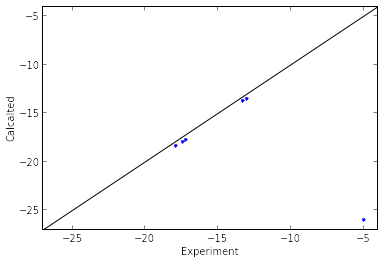

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = 10*np.random.rand(6) - 20

### Scenario 1
#y = 1.0*x - 0.5

### Scenario 2
y = 1.0*x - 0.5
x[1] = -5
y[1] = -26

min = np.amin(np.array([np.amin(x),np.amin(y)]))-1
max = np.amax(np.array([np.amax(x),np.amax(y)]))+1
plt.axis([min, max, min, max])
plt.xlabel('Experiment')
plt.ylabel('Calcalted')
plt.plot([min, max], [min,max], 'k-');
plt.plot(x, y, 'b.');


       Slope   -0.54  (  0.00)
      Interc  -25.36  (  0.00)
           R   -0.58  (  0.00)
         R^2    0.34  (  0.00)
        RMSE    8.59  (  0.00)
         MSE   -3.92  (  0.00)
         MUE    3.92  (  0.00)
         TAU    0.33  (  0.00)


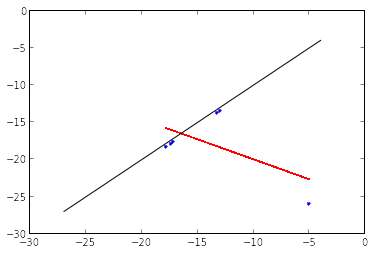

In [2]:
BootCyc=10000
R = np.zeros([BootCyc], np.float64)
R2 = np.zeros([BootCyc], np.float64)
RMSE = np.zeros([BootCyc], np.float64)
MSE = np.zeros([BootCyc], np.float64)
MUE = np.zeros([BootCyc], np.float64)
Slp = np.zeros([BootCyc], np.float64)
Int = np.zeros([BootCyc], np.float64)
Tau = np.zeros([BootCyc], np.float64)
MetricNames = ('Slope', 'Interc', 'R', 'R^2', 'RMSE', 'MSE', 'MUE', 'TAU')
SampleTypes = ('NoUWoutRep', 'LgUWoutRep', 'NoUWRep', 'LgUWRep')
MetricVals = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MetricErrs = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MTmp = np.zeros([len(MetricNames),BootCyc], np.float64)
xtmp = np.zeros([len(x)], np.float64)
ytmp = np.zeros([len(x)], np.float64)
yfit = np.zeros([len(x)], np.float64)
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 0
for b in range(BootCyc):
    for i in range(len(x)):
        j = i                          # Sample without replacment
        #j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 0.00001)  # No uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])





       Slope   -0.54  (  0.18)
      Interc  -25.35  (  2.67)
           R   -0.54  (  0.16)
         R^2    0.31  (  0.16)
        RMSE    8.78  (  0.80)
         MSE   -3.92  (  0.81)
         MUE    4.87  (  0.57)
         TAU    0.05  (  0.17)


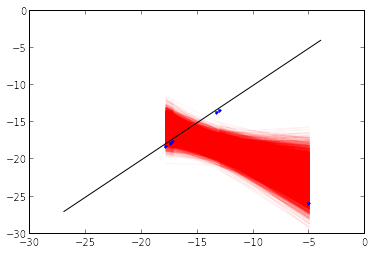

In [3]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 1
for b in range(BootCyc):
    for i in range(len(x)):
        j = i                          # Sample without replacment
        #j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 2.00001)  # Large uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])



       Slope   -0.12  (  0.80)
      Interc  -18.38  ( 12.73)
           R   -0.15  (  0.82)
         R^2    0.70  (  0.28)
        RMSE    7.02  (  4.97)
         MSE   -3.93  (  3.14)
         MUE    3.93  (  3.14)
         TAU    0.27  (  0.45)


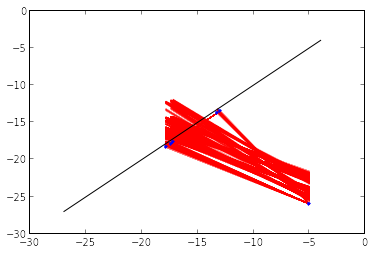

In [4]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 2
for b in range(BootCyc):
    for i in range(len(x)):
        #j = i                          # Sample without replacment
        j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 0.00001)  # No uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])


       Slope    1.00  (111.68)
      Interc    1.07  (1944.56)
           R   -0.22  (  0.68)
         R^2    0.52  (  0.24)
        RMSE    7.66  (  4.43)
         MSE   -3.94  (  3.22)
         MUE    4.90  (  2.99)
         TAU    0.04  (  0.40)


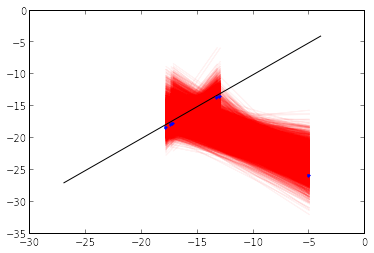

In [5]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);


SampleType = 3
for b in range(BootCyc):
    for i in range(len(x)):
        #j = i                          # Sample without replacment
        j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 2.00001)  # Large uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05,  zorder=1)
    

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])

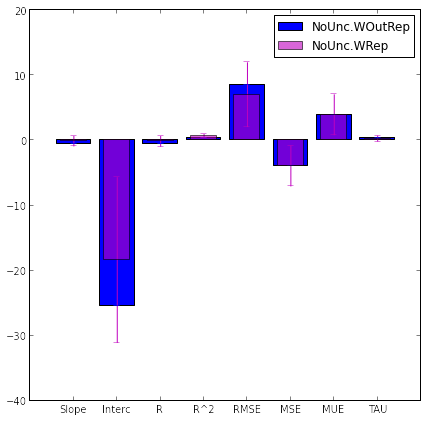

Metric        NoUnc.WOutRep        LgUnc.WOutRep         NoUnc.WRep         LgUnc.WRep
       Slope  -0.54  (  0.00)     -0.54  (  0.18)     -0.12  (  0.80)      1.00  (111.68)    
      Interc -25.36  (  0.00)    -25.35  (  2.67)    -18.38  ( 12.73)      1.07  (1944.56)    
           R  -0.58  (  0.00)     -0.54  (  0.16)     -0.15  (  0.82)     -0.22  (  0.68)    
         R^2   0.34  (  0.00)      0.31  (  0.16)      0.70  (  0.28)      0.52  (  0.24)    
        RMSE   8.59  (  0.00)      8.78  (  0.80)      7.02  (  4.97)      7.66  (  4.43)    
         MSE  -3.92  (  0.00)     -3.92  (  0.81)     -3.93  (  3.14)     -3.94  (  3.22)    
         MUE   3.92  (  0.00)      4.87  (  0.57)      3.93  (  3.14)      4.90  (  2.99)    
         TAU   0.33  (  0.00)      0.05  (  0.17)      0.27  (  0.45)      0.04  (  0.40)    


In [6]:
plt.figure(figsize=(7,7))
xpos = np.arange(len(MetricNames))
plt.bar(xpos, MetricVals[0], yerr=MetricErrs[0], color='b', ecolor='b', 
        align='center', alpha=1.0, zorder=1, width=0.8, label='NoUnc.WOutRep')
#plt.bar(xpos, MetricVals[1], yerr=MetricErrs[1], color='c', ecolor='c',
#        align='center', alpha=0.7, zorder=2, width=0.7, label='LgUnc.WOutRep')
plt.bar(xpos, MetricVals[2], yerr=MetricErrs[2], color='m', ecolor='m',
        align='center', alpha=0.6, zorder=3, width=0.6, label='NoUnc.WRep')
#plt.bar(xpos, MetricVals[3], yerr=MetricErrs[3], color='y', ecolor='y',
#        align='center', alpha=0.5, zorder=4, width=0.5, label='LgUnc.WRep')
plt.xticks(xpos, MetricNames)
plt.legend()
plt.show()

print "Metric        NoUnc.WOutRep        LgUnc.WOutRep         NoUnc.WRep         LgUnc.WRep"
for i in range(len(MetricNames)):
    print "%12s" % MetricNames[i],
    for SampleType in range(len(SampleTypes)):
        print "%6.2f  (%6.2f)   " % (MetricVals[SampleType,i],MetricErrs[SampleType,i]),
    print ''